# Exploration du corpus

## Imports

In [1]:
from collections import defaultdict
import os

import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = "../../data/camille_syndicalisme/"
files = sorted(os.listdir(path))
len(files)

520

## Explorer les noms de fichier

In [3]:
chaine = 'KB_JB838_1960-01-07_01-00003'
type(chaine)

str

In [4]:
# la méthode split
chaine_split = chaine.split('_')
chaine_split

['KB', 'JB838', '1960-01-07', '01-00003']

In [5]:
# Accéder à la date
date = chaine_split[2]

# Accéder à l'année
date_split = date.split('-')
year = date_split[0]
date_split

['1960', '01', '07']

In [6]:
# Manipuler les str pour convertir une année en décennie
year[:3]

'196'

In [7]:
year[-1]

'0'

In [8]:
year[:3] + '0s'

'1960s'

In [9]:
all_years = [str(year) for year in range(1960, 1969)]

In [10]:
count_decade = defaultdict(int)
count_month = defaultdict(int)
count_newspapers = defaultdict(int)
covered_years = set()

for f in files:
    if "_" in f and f.endswith("txt"):
        elems = f.split("_")
        
        newspaper = elems[1]
        
        year = elems[2].split("-")[0]
        covered_years.add(year)
        decade = year[:3] + "0s"
        
        month = int(elems[2].split("-")[1])
        
        count_decade[decade] += 1
        count_newspapers[newspaper] += 1
        count_month[month] += 1
    else:
        print(f"Anomalous file: {f}")

## Visualisation du nombre de journaux par mois

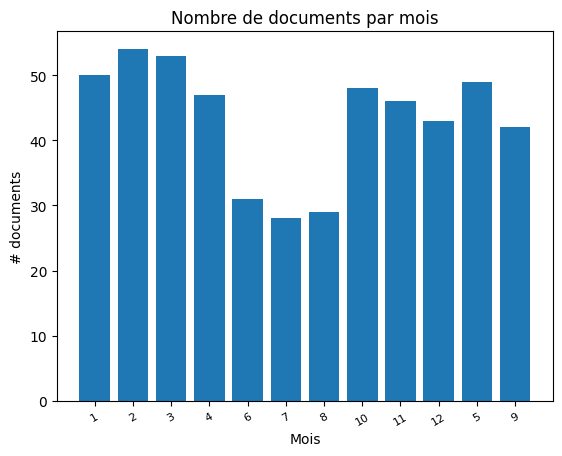

In [11]:
index = np.arange(len(count_month))
plt.bar(index, count_month.values())
plt.xlabel('Mois')
plt.ylabel('# documents')
plt.xticks(index, count_month.keys(), fontsize=8, rotation=30)
plt.title('Nombre de documents par mois')
plt.show()

# Analalyse de la distribution du vocabulaire

## Imports et dépendances

In [12]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fabio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Créer une une liste de stopwords

In [13]:
# Stopwords + mots fréquents inutiles
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "pers", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "voire", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "bruxelles", "brux", "chambre",
       "maison", "rue", "villa", "tél", "téléph", "prix", "louer", "lieu", "midi", "devant",
       "bon", "très", "déjà", "vers", "long", "lundi", "mardi", "mercredi", "jeudi", "vendredi",
       "samedi", "dimanche", "leurs", "chaque", "quelque", "année", "place", "grand",
       "agence", "ans", "ecr", "ecrire", "part", "heures", "vendre", "jour", "mod",
       "cours", "belgique", "pays", "francs", "belge", "grande", "petite", "petit",
       "toute", "faç", "soir", "compte", "il", "elle", "elles", "anvers", "namur", "liège",
       "appart", "rapp", "garage", "cas", "prés", "heure", "janvier", "février", "mars", "avril",
       "mai", "juin", "juillet", "août", "septembre", "octobre", "novembre", "décembre", "premier",
       "gros", "alors", "dès", "cent", "vend", "demande", "référ", "lot", "achat", "cher", "bonne",
       "peu", "beaucoup", "avant", "tant", "trav", "suite", "vingt", "bat", "parmi", "aujourd",
       "mois", "etc", "vente", "nord", "cherche", "avenue", "temps", "quelques", "jours", "partie",
       "beau", "belle", "comm", "jamais", "près", "point", "mme", "app", "jardin", "jard",
       "cap", "centre", "sud", "ouest", "est", "env", "haut", "dame", "homme", "fem", "fort",
       "divers", "grands", "cour", "chez", "jean", "hommes", "femmes","plusieurs", "vient",
       "celui", "matin", "question", "bureau", "mat", "bas", "pris", "gar", "car",
       "min", "dernier", "trop", "début", "dan", "reste", "lequel", "laquelle", "ceux", "celles",
       "première", "argent", "succès", "semaine", "quand", "nom", "but", "max", "série", "hui",
       "un", "deux", "trois", "quatre", "cinq", "six", "sept", "huit", "neuf", "dix", "serv",
       "fois", "fit", "cependant", "int", "annoncer", "nombreux", "nombreuses", "téléphone",
       "demi", "quart", "seul", "seule", "rez", "atelier", "services", "chaussée", "ailleurs",
       "seulement", "départ", "parti", "entrée", "nombre", "fille", "occasion", "offre",
       "rien", "sér", "service", "mètres", "avis", "dos", "tandis", "offres", "auto", "chêne",
       "résultat", "cont", "culs", "notamment", "eau", "dés", "résultats", "voiture", "pet",
       "assez", "louvain", "partir", "bons", "main", "noir", "étage", "mén", "ire", "bur", "réf",
       "adresser", "main", "article", "club", "enfin", "journée", "journées", "produits", "mons",
       "enf", "également", "monsieur", "madame", "nuit", "conditions", "importante",
       "paul", "sup", "ord", "com", "façon", "ménage", "commune", "mlle", "côté", "joseph", "louis",
       "henri", "bel", "séance", "sujet", "article", "mieux", "ach", "lors", "meubles", "camion",
       "malgré", "effet", "mot", "beaux", "puis", "cond", "titre", "vis", "mol", "concret", "gens",
       "gand", "haute", "courant", "ixelles", "anderlecht", "schaerbeek", "uccle", "pierre",
       "situation", "rem", "lux", "mach", "suivant", "direction", "dames", "grandes", "marie",
       "femme", "mari", "tient", "parc", "jette", "hôtel", "petits", "diverses", "actuellement",
       "louise", "prochain", "membres", "bols", "petites", "lots", "font", "adr", "forest",
       "georges", "écrit", "environ", "peuvent", "jne", "âge", "quant", "selon", "magasin",
       "affaires", "acheteur", "acheteurs", "affaire", "parce", "tapis", "groupe", "vieux", "jeunes",
       "achet", "doivent", "mesure", "tonnes", "waterloo", "fils", "tête", "millions", "pourrait",
       "heu", "moment", "double", "outre", "inst", "jeunes", "années", "chamb", "pied", "aven",
       "semble", "sens", "den", "sait", "forme", "matériel", "salle", "jeune", "off", "bureaux",
       "pièces", "poids", "étalent", "meub", "unique", "souvent", "hier", "lorsque", "points", "art"]

#ajout de stopwords et mots fréquents donnés par chatgpt
extra_sw = [
    "afin", "aucun", "aucune", "auquel", "auxquels", "auxquelles", "ceci", "cela", "celui-ci",
    "celle-ci", "ceux-ci", "celles-ci", "chacun", "chacune", "certains", "certaines", "difficile",
    "ensemble", "ensuite", "exact", "exacte", "exactement", "hormis", "ici", "là", "la", "lesquels",
    "lesquelles", "loué", "louée", "louées", "loués", "location", "même", "mêmes", "nécessaire",
    "nécessaires", "nouveau", "nouvelle", "nouvelles", "nouveaux", "parfois", "partout", "pendant",
    "personne", "personnes", "plusieurs", "possible", "possibles", "près", "proche", "proches", 
    "propos", "quasi", "quiconque","région", "secteur", "surface", "surtout", "tel", "telle", "tels",
    "telles", "toujours", "trouver", "trouvé", "trouvée", "vers", "voir", "voici", "voilà",
    
    # Variantes utiles pour annonces belges / FR
    "bxl", "bxl.", "brussel", "andr", "prox", "quartier", "immeuble", "immeubles", "habitation",
    "habitations", "annonce", "annonces", "annoncé", "annoncée", "situé", "située", "situées",
    "situés", "neuf", "neuve", "neufs", "neuves", "ancien", "ancienne", "anciens", "anciennes",

    # Mots très fréquents mais peu utiles
    "afin", "tellement", "quasi", "tard", "tôt", "loin", "haut", "bas", "grand", "petit", "grosse", "petites",

    # Articles & formes conjuguées additionnelles
    "au", "aux", "du", "des", "aux", "leurs", "vos", "nos", "mon", "ton", "son",
    "ma", "ta", "sa", "mes", "tes", "ses", "notre", "votre", "leurs",

    # Autres verbes très fréquents
    "mettre", "mis", "mise", "mises", "trouver", "trouve", "trouvée", "trouvées",
    "voir", "vu", "vue", "vues", "donner", "donne", "donné", "venir", "venu", "venue",
]
sw += extra_sw
sw = set(sw)


In [14]:
print(f"{len(sw)} stopwords:\n {sorted(sw)}")

675 stopwords:
 ['ach', 'achat', 'achet', 'acheteur', 'acheteurs', 'actuellement', 'adr', 'adresser', 'affaire', 'affaires', 'afin', 'agence', 'ai', 'aie', 'aient', 'aies', 'ailleurs', 'ainsi', 'ait', 'alors', 'ancien', 'ancienne', 'anciennes', 'anciens', 'anderlecht', 'andr', 'annonce', 'annoncer', 'annonces', 'annoncé', 'annoncée', 'année', 'années', 'ans', 'anvers', 'août', 'app', 'appart', 'après', 'argent', 'art', 'article', 'as', 'assez', 'atelier', 'au', 'aucun', 'aucune', 'aujourd', 'auquel', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'auto', 'autre', 'autres', 'aux', 'auxquelles', 'auxquels', 'avaient', 'avais', 'avait', 'avant', 'avec', 'aven', 'avenue', 'avez', 'aviez', 'avions', 'avis', 'avoir', 'avons', 'avril', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'bas', 'bat', 'beau', 'beaucoup', 'beaux', 'bel', 'belge', 'belgique', 'belle', 'bien', 'bols', 'bon', 'bonne', 'bons', 'brussel', 'br

## Tokeniser

In [15]:
txt_path = '../../data/camille_syndicalisme'
if not os.path.exists(txt_path):
    os.mkdir(txt_path)

In [16]:
txts = []
for f in os.listdir(txt_path):
    if os.path.isfile(os.path.join(txt_path, f)):
        txts.append(f)
txts[:10]

['KB_JB838_1960-01-07_01-00003.txt',
 'KB_JB838_1960-01-10_01-00002.txt',
 'KB_JB838_1960-01-30_01-00007.txt',
 'KB_JB838_1960-02-11_01-00002.txt',
 'KB_JB838_1960-02-16_01-00007.txt',
 'KB_JB838_1960-02-25_01-00005.txt',
 'KB_JB838_1960-02-27_01-00002.txt',
 'KB_JB838_1960-03-23_01-00006.txt',
 'KB_JB838_1960-04-12_01-00009.txt',
 'KB_JB838_1960-06-05_01-00003.txt']

In [17]:
with open("../../data/allsyndicalisme.txt", "w", encoding="utf-8") as output_file:
    for file in os.listdir(txt_path):
        if file.endswith(".txt"):
            with open(os.path.join(txt_path, file), "r", encoding="utf-8") as f:
                output_file.write(f.read())


In [18]:
# Récupération du contenu du fichier
path = "../../data/allsyndicalisme.txt"
limit = 10**8

with open(path, 'r', encoding='utf-8') as f:
    text = f.read()[:limit]

In [19]:
# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

4441325 words found


In [20]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

1335834 words kept (145296 different word forms)


In [21]:
fdist = nltk.FreqDist(kept)
fdist.most_common(20)

[('ministre', 4107),
 ('président', 3854),
 ('gouvernement', 3521),
 ('politique', 3104),
 ('général', 2566),
 ('conseil', 2404),
 ('etat', 1947),
 ('travail', 1924),
 ('paris', 1920),
 ('loi', 1888),
 ('saint', 1742),
 ('france', 1735),
 ('ordre', 1662),
 ('nationale', 1653),
 ('problèmes', 1582),
 ('monde', 1553),
 ('projet', 1541),
 ('enfants', 1537),
 ('vie', 1486),
 ('commission', 1478)]

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

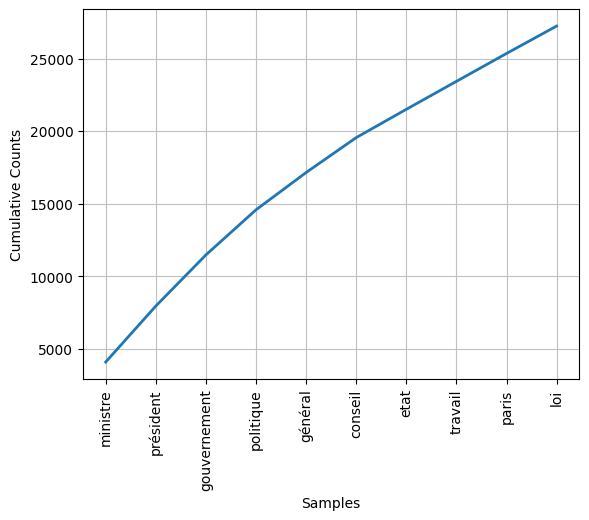

In [22]:
# Plot: les n mots les plus fréquents
n = 10
fdist.plot(n, cumulative=True)

# Extraction de Keywords

## Imports

In [23]:
import os
import yake

## Extraire les mots clés d'un document avec Yake

In [24]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [59]:
# Lister les Fichiers
data_path = "../../data/camille_syndicalisme"
files = [f for f in os.listdir(data_path) if f.endswith('.txt')]

In [26]:
# Imprimer le nombre de fichiers identifiés
len(files)

520

In [27]:
# Choisir un fichier
this_file = files[0]
this_file

'KB_JB838_1960-01-07_01-00003.txt'

In [28]:
# Récupérer le texte du fichier
text = open(os.path.join(data_path, this_file), 'r', encoding='utf-8').read()
text[:500]

"JEUDI 7 JANVIER 1960 - LE som «HW IS ^'èrc, !c U . ré. paj. ’évl. peut cder n d our. > des I sont un icile, arce ab- des j'en ! j'y !S..., fin. îifie Rire îSSi. peut avec e et ?..., sans ème au- Réactions contre la croix gammée Des voix commencent à s’élever contre les actes d’antisémitisme Bonn décide des mesures de répression Genève, 0 Janvier (A. P.) Le Conseil mondial des Églises a I lancé un appel pour la répression immédiate de l’antisémitisme et a S demandé à ses membres de renon- i cer à"

In [29]:
# Extraire les mots clés de ce texte
keywords = kw_extractor.extract_keywords(text)
keywords

[('JANVIER', np.float64(0.00537311925228842)),
 ('président', np.float64(0.009872367276772464)),
 ('d’autre part', np.float64(0.01170233571698091)),
 ('croix gammées', np.float64(0.012005107425747622)),
 ('mercredi', np.float64(0.014066954957932221)),
 ('ministre', np.float64(0.0181982848909021)),
 ('soir', np.float64(0.019940694264508223)),
 ('d’une', np.float64(0.02164295020537809)),
 ('parti', np.float64(0.02182504239491501)),
 ('croix', np.float64(0.022778775316704098)),
 ('mardi soir', np.float64(0.02305551187332923)),
 ('pays', np.float64(0.024941876738731987)),
 ('d’un', np.float64(0.02507570302292474)),
 ('qu’il', np.float64(0.025105380078404835)),
 ('Conseil', np.float64(0.025932525798336582)),
 ('mercredi soir', np.float64(0.026876825069039326)),
 ('part', np.float64(0.02713067648101709)),
 ('Londres', np.float64(0.02885744641574957)),
 ('d’autre', np.float64(0.02926744184226985)),
 ('TABLE RONDE', np.float64(0.029365697956751417)),
 ('Bonn', np.float64(0.029580451736694848))

In [30]:
# Ne garder que les bigrammes
kept = []
for kw, score in keywords:
    words = kw.split()
    if len(words) == 2:
        kept.append(kw)
kept

['d’autre part',
 'croix gammées',
 'mardi soir',
 'mercredi soir',
 'TABLE RONDE',
 'Etats fédérés',
 'Conseil mondial',
 'délégués belges',
 'Congo belge']

## Faire la même opération sur les dix premiers documents

In [60]:
for f in sorted(files)[:10]:
    text = open(os.path.join(data_path, f), 'r', encoding="utf-8").read()
    keywords = kw_extractor.extract_keywords(text)
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 2:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

KB_JB838_1960-01-07_01-00003.txt mentions these keywords: d’autre part, croix gammées, mardi soir, mercredi soir, TABLE RONDE, Etats fédérés, Conseil mondial, délégués belges, Congo belge...
KB_JB838_1960-01-10_01-00002.txt mentions these keywords: lit Aldous, lignes Florennes, Juge Othon, Huxley III, Aldous Huxley, Van Bever, Brésil Central, Fédération bruxelloise, MATO GROSSO, Santé publique...
KB_JB838_1960-01-30_01-00007.txt mentions these keywords: JAPON ÉCLATE, Japon n’est, METAL ARGENTÉ, Japon moderne, Maison Wolfers, l’usine Japon, Grandes Editions, Etablissements Braconnier, Etablissements Louis, Jacques Danois, Jacques Courtois, bas salaires...
KB_JB838_1960-02-11_01-00002.txt mentions these keywords: QUART D'HEURE, D'HEURE avec., SOIR JEUDI, Jean MERCURE, grandes compagnies, Graham Greene, GRANDE EUROPE, Belgique d’une, mardi soir...
KB_JB838_1960-02-16_01-00007.txt mentions these keywords: Lee Konitz, braves petits, Progrès social, jeu fort, Pierre Brasseur, Byron Janis, Da

## Faire la même opération sur le corpus entier

In [64]:
# Lire le fichier unique
text = open('../../data/allsyndicalisme.txt', 'r', encoding="utf-8").read()

# Extraire les mots-clés
keywords = kw_extractor.extract_keywords(text)

# Filtrer pour garder seulement les mots-clés de 2 mots
kept = []
for kw, score in keywords:
    words = kw.split()
    if len(words) == 2:
        kept.append(kw)

# Afficher les résultats
print(f"allsyndicalisme.txt mentions these keywords: {', '.join(kept)}...")

allsyndicalisme.txt mentions these keywords: New York, cours d’une, Conseil communal, Nations Unies, Madame Jean, d’autre part, PREMIERE PAGE, Marché commun, Jean van, VOIR DEBUT, Conseil national...


# Nuages de mots

## Imports et stopwords

In [32]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fabio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [33]:
# Choisir une année
year = 1962

In [34]:
# Lister les fichiers de cette année
data_path = '../../data/camille_syndicalisme'
txt_path = '../../data/camille_syndicalisme'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
len(txts)

51

In [35]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [36]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

51

In [37]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][0:200]

'LE SOIR VENDREDI 5 JANVIER 1962 A LA RADIO NOTRE SELECTION : Vendredi 5 janvier 14.80 19.00 10.45 Ï0.00 •20.2# ‘ 21,32 121.40 : «.O# 19.00 20.00 : 22.30 20.00 20.03 20.30 ; 21.00 : 22.18 : 22.30 : 20.'

In [38]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../../data/tmp_syndicalisme'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [39]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

"LE SOIR VENDREDI 5 JANVIER 1962 A LA RADIO NOTRE SELECTION : Vendredi 5 janvier 14.80 19.00 10.45 Ï0.00 •20.2# ‘ 21,32 121.40 : «.O# 19.00 20.00 : 22.30 20.00 20.03 20.30 ; 21.00 : 22.18 : 22.30 : 20.00 20.00 20.30 20.37 21.04 21.15 21.15 22.10 22.15 THEATRE — JEUX FRANCK 11 î « Le barrage >, plè ce radloph, de R. Dion. FRANCE 111 f < La tapisserie de Sire Rouge-Croix », conte radloph, d'après « Sponsor ». de L. Masson.  FRANCE 1 : « Chfttcnu en Suède », comédie de F. Sagan, SOTTENS Î Bêntrlx Du"

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [40]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [41]:
clean_text(year, folder=temp_path)

'Output has been written in ../../data/tmp_syndicalisme/1962_clean.txt!'

In [42]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'RADIO SELECTION THEATRE JEUX FRANCK BARRAGE PLÈ RADLOPH DION FRANCE TAPISSERIE SIRE ROUGE CROIX CONTE RADLOPH SPONSOR MASSON FRANCE CHFTTCNU SUÈDE COMÉDIE SAGAN SOTTENS BÊNTRLX DUSSANE ÉVOQUE REINES THÉÂTRE MARIA CASARÊS FRANCE SERMENT TREIZE MARCLLLAC LUXEMBOURG VÉCU COIN MONTE CNSSTNO SOTTENS ILEUVC FRESQUE DANIEL ANET THEATRE LYRIQUE OPÉRA DISQUES OPÉRAS FRANCE FORÊT BLEUE CONTE LYRIQUE PERRAULT FRANCE VOIX CÉLÉBRÉS CONCERTS HOMO MUSIQUE MAÎTRES ARA ANTIQUE FRANCE ORCHESTRE PHILHARMONIQUE HOM'

## Nuage de mots

### Afficher les termes les plus fréquents


In [43]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('MINISTRE', 377), ('GOUVERNEMENT', 363), ('PRÉSIDENT', 359), ('POLITIQUE', 307), ('CONSEIL', 258), ('GÉNÉRAL', 241), ('TRAVAIL', 209), ('FRANCE', 205), ('ETAT', 200), ('NATIONALE', 183)]


### Créer, stocker et afficher le nuage de mots

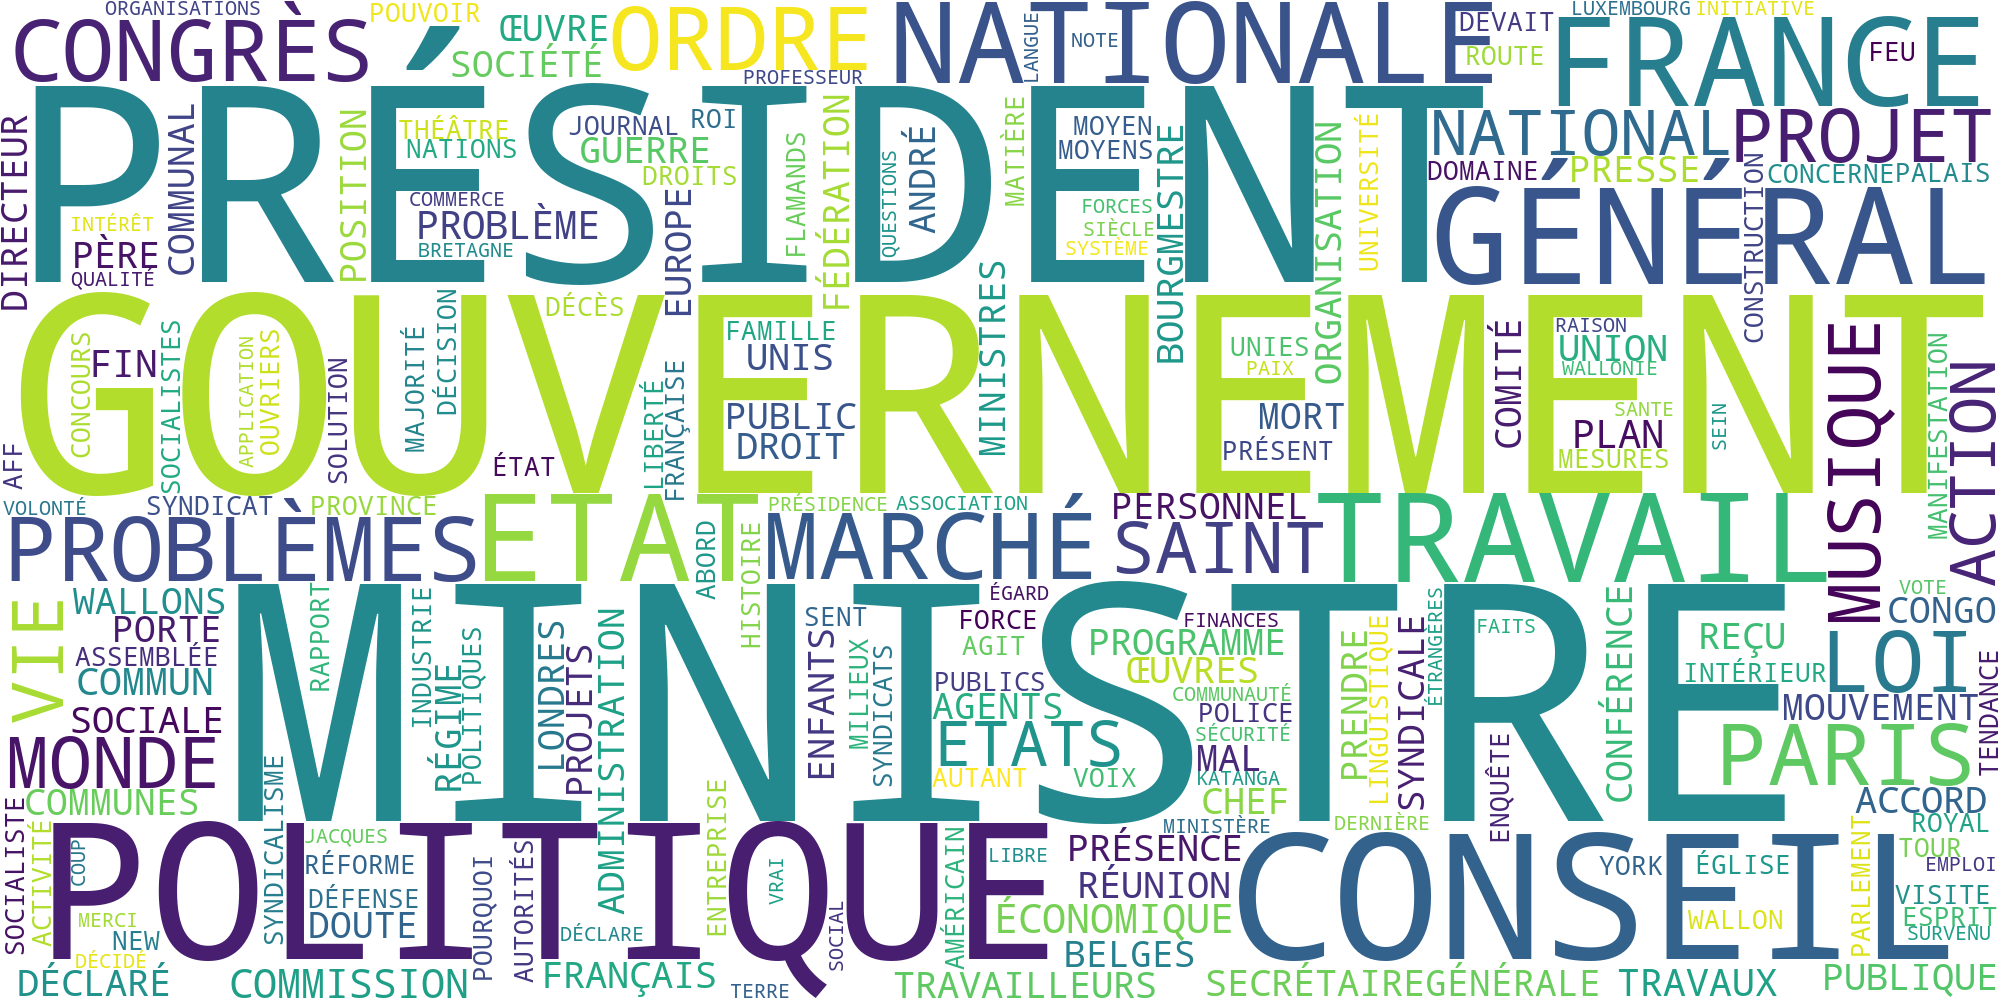

In [44]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

# Reconnaissance d'entités nommées avec SpaCy

## Imports

In [45]:
from collections import defaultdict
import spacy
from spacy.lang.fr.examples import sentences
import  fr_core_news_md

In [46]:
nlp = spacy.load('fr_core_news_md')

## Appliquer la reconnaissance d'entités nommées sur notre corpus

In [81]:
# Charger le texte
n=1000000
text = open("../../data/allsyndicalisme.txt", encoding='utf-8').read()[:n]

In [82]:
%%time
# Traiter le texte

doc = nlp(text)

CPU times: total: 32.2 s
Wall time: 32.1 s


In [83]:
# Compter les entités
people = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "PER" and len(ent.text) > 3:
        people[ent.text] += 1

In [84]:
# Stratégie 1 : Filtrage manuel avec des mots-clés
def is_likely_organization(text):
    """Détecte si un texte ressemble à une organisation"""
    org_keywords = ['Agence', 'Société', 'Compagnie', 'Institut', 'Association', 
                    'Banque', 'Groupe', 'Administration', 'Service', 'Bureau',
                    'A.F.P.', 'C.S.C.', 'F.G.T.B.', 'O.N.U.', 'P.S.C.']
    return any(keyword in text for keyword in org_keywords)

def is_likely_person(text):
    """Détecte si un texte ressemble à un nom de personne"""
    # Les vrais noms de personnes ont souvent un prénom + nom
    # ou des titres comme M., Mme, etc.
    person_titles = ['M.', 'Mme', 'Monsieur', 'Madame', 'Dr', 'Professeur', 'ministre']
    words = text.split()
    
    # Si contient un titre, probablement une personne
    if any(title in text for title in person_titles):
        return True
    
    # Si 2 mots avec majuscules, probablement prénom + nom
    if len(words) == 2 and all(w[0].isupper() for w in words if w):
        return True
    
    return False


In [85]:
# Compter les entités avec filtrage amélioré
people = defaultdict(int)
organizations_from_per = defaultdict(int)

for ent in doc.ents:
    if ent.label_ == "PER" and len(ent.text) > 3:
        # Si ça ressemble à une organisation, on le reclasse
        if is_likely_organization(ent.text):
            organizations_from_per[ent.text] += 1
        else:
            people[ent.text] += 1

In [86]:
# Compter les entités de type PERSONNE (PER)
people = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "PER" and len(ent.text) > 3:
        people[ent.text] += 1

# Trier et imprimer les personnes (nettoyées)
print("=== PERSONNES LES PLUS MENTIONNÉES (nettoyé) ===\n")
sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)

for person, freq in sorted_people[:50]:
    print(f"{person} apparaît {freq} fois dans le corpus")

=== PERSONNES LES PLUS MENTIONNÉES (nettoyé) ===

M. Cool apparaît 33 fois dans le corpus
de Gaulle apparaît 19 fois dans le corpus
M. Khrouchtchev apparaît 16 fois dans le corpus
général de Gaulle apparaît 16 fois dans le corpus
A.F.P. apparaît 15 fois dans le corpus
P. S. C. apparaît 14 fois dans le corpus
M. Meyers apparaît 13 fois dans le corpus
Fabiola apparaît 13 fois dans le corpus
Chah apparaît 13 fois dans le corpus
Mobutu apparaît 12 fois dans le corpus
C. S. C. apparaît 11 fois dans le corpus
Arnaud apparaît 11 fois dans le corpus
Mozart apparaît 10 fois dans le corpus
Delbecque apparaît 10 fois dans le corpus
M. Lumumba apparaît 10 fois dans le corpus
M. Gillardin apparaît 10 fois dans le corpus
M. De Schryver apparaît 9 fois dans le corpus
O. N. U. apparaît 9 fois dans le corpus
Lumumba apparaît 9 fois dans le corpus
président de la République apparaît 8 fois dans le corpus
Albert apparaît 8 fois dans le corpus
A. F. P. apparaît 8 fois dans le corpus
Hugues apparaît 8 fois

In [87]:
# Compter les lieux (LOC)
locations = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "LOC" and len(ent.text) > 3:
        locations[ent.text] += 1
# Trier et imprimer les lieux
print("=== LIEUX LES PLUS MENTIONNÉS ===\n")
sorted_locations = sorted(locations.items(), key=lambda kv: kv[1], reverse=True)

for location, freq in sorted_locations[:50]:
    print(f"{location} apparaît {freq} fois dans le corpus")

=== LIEUX LES PLUS MENTIONNÉS ===

Congo apparaît 105 fois dans le corpus
Belgique apparaît 90 fois dans le corpus
Paris apparaît 83 fois dans le corpus
Bruxelles apparaît 82 fois dans le corpus
Etat apparaît 75 fois dans le corpus
Etats-Unis apparaît 48 fois dans le corpus
Allemagne apparaît 36 fois dans le corpus
France apparaît 28 fois dans le corpus
Londres apparaît 25 fois dans le corpus
Afrique apparaît 25 fois dans le corpus
la France apparaît 25 fois dans le corpus
Anvers apparaît 20 fois dans le corpus
Belges apparaît 20 fois dans le corpus
Belga apparaît 18 fois dans le corpus
Mexique apparaît 17 fois dans le corpus
Moscou apparaît 17 fois dans le corpus
Angleterre apparaît 17 fois dans le corpus
Suisse apparaît 16 fois dans le corpus
Léopoldville apparaît 16 fois dans le corpus
P.S.C. apparaît 16 fois dans le corpus
Europe apparaît 14 fois dans le corpus
Inde apparaît 13 fois dans le corpus
Gand apparaît 13 fois dans le corpus
Liège apparaît 13 fois dans le corpus
Algérie ap

In [88]:
# Compter les organisations (ORG)
organizations = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "ORG" and len(ent.text) > 3:
        organizations[ent.text] += 1
        
# Trier et imprimer les organisations
print("\n\n=== ORGANISATIONS LES PLUS MENTIONNÉES ===\n")
sorted_organizations = sorted(organizations.items(), key=lambda kv: kv[1], reverse=True)

for org, freq in sorted_organizations[:50]:
    print(f"{org} apparaît {freq} fois dans le corpus")



=== ORGANISATIONS LES PLUS MENTIONNÉES ===

Conseil apparaît 42 fois dans le corpus
Chambre apparaît 22 fois dans le corpus
Parlement apparaît 22 fois dans le corpus
Sénat apparaît 18 fois dans le corpus
Commission apparaît 18 fois dans le corpus
Nations Unies apparaît 14 fois dans le corpus
O.N.U. apparaît 14 fois dans le corpus
Reuter apparaît 13 fois dans le corpus
ministre de la Santé publique apparaît 13 fois dans le corpus
Congo belge apparaît 10 fois dans le corpus
Finances apparaît 8 fois dans le corpus
Blancs apparaît 8 fois dans le corpus
ministre de l’Intérieur apparaît 7 fois dans le corpus
Fédération apparaît 7 fois dans le corpus
Union soviétique apparaît 6 fois dans le corpus
ministre du Commerce apparaît 6 fois dans le corpus
Philips apparaît 5 fois dans le corpus
ministère des Affaires étrangères apparaît 5 fois dans le corpus
Gallimard apparaît 5 fois dans le corpus
Conseil provincial apparaît 5 fois dans le corpus
General Motors apparaît 5 fois dans le corpus
Unive

In [89]:
# Bonus : Vue d'ensemble de toutes les entités
print("\n\n=== STATISTIQUES GLOBALES ===\n")
all_entities = defaultdict(int)
for ent in doc.ents:
    all_entities[ent.label_] += 1

for entity_type, count in sorted(all_entities.items(), key=lambda kv: kv[1], reverse=True):
    print(f"{entity_type}: {count} entités détectées")



=== STATISTIQUES GLOBALES ===

LOC: 4198 entités détectées
PER: 4034 entités détectées
MISC: 2551 entités détectées
ORG: 1452 entités détectées
